Introduction

Our metric is the most fun neighborhood. The most fun neighborhoods are the neighborhoods with the most baseball fields, playground equipment, and parks. These facilites allow residents to have more fun.

In [43]:
import pandas as pd
import geopandas
%matplotlib inline

In [60]:
fields = pd.read_csv('fields.csv')
neighborhood_counts = fields['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.reset_index()
neighborhood_counts.columns = ['neighborhood', 'Count']
neighborhood_counts = neighborhood_counts.sort_values(by='Count', ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [121]:
fields_map = neighborhoods.merge(neighborhood_counts, how='left', left_on='hood', right_on='neighborhood')
fields_map = fields_map.sort_values(by='Count', ascending=False)
fields_map[['neighborhood','Count']].head()

,neighborhood,Count
24,Squirrel Hill South,7.0
59,Brighton Heights,7.0
42,Morningside,6.0
41,Brookline,6.0
18,Hazelwood,4.0


Shows the five neighborhoods with the most baseball fields. 

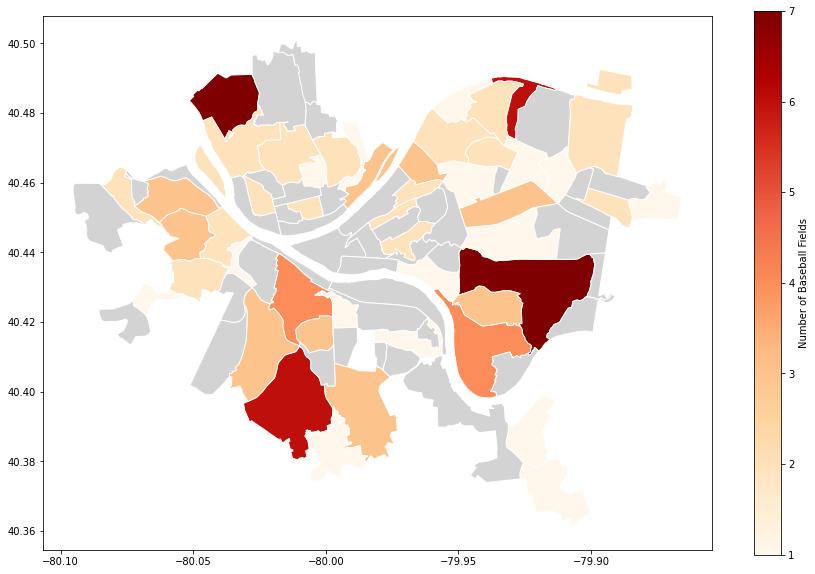

In [63]:
fields_map.plot(column='Count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Baseball Fields"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Shows the amount of baseball fields per __neighborhood__, while marking the ones with none as __gray__.

According to this dataset, Squirrel Hill South and Brighton Heights are tied for the most fun neighborhoods with seven baseball fields each.

In [80]:
equipment = pd.read_csv("playground_Equipment.csv")
equipment[['name', 'equipment_type', 'neighborhood']].head(10)

,name,equipment_type,neighborhood
0,Able Long Playground,Play Area 2 to 5,Beechview
1,North Ave. Playground,Play Area 2 to 5,Allegheny Center
2,Vietnam Veteran's Playground,Slide,Squirrel Hill South
3,Schenley Overlook Playground,Swing 2 Bays,Squirrel Hill South
4,Schenley Overlook Playground,Slide,Squirrel Hill South
5,Chartiers Playground,Swing 2 Bays,Windgap
6,Chartiers Playground,Swing 2 Bays,Windgap
7,Chartiers Playground,Play Area 2 to 5,Windgap
8,Chartiers Playground,Play Area 5 to 12,Windgap
9,Chartiers Playground,Whirl,Windgap


Tells the __type__ of equipment in each neighborhood.

In [81]:
equipment_counts = equipment['neighborhood'].value_counts()

equipment_counts = equipment_counts.reset_index()
equipment_counts.columns = ['neighborhood', 'Count']
print(equipment_counts.head(15))

           neighborhood  Count
0   Squirrel Hill South     32
1          East Liberty     26
2             Beechview     21
3      Allegheny Center     15
4     South Side Slopes     14
5             Hazelwood     13
6              Sheraden     13
7               Elliott     11
8   Squirrel Hill North     10
9      Mount Washington     10
10        Highland Park     10
11          Beltzhoover     10
12        Lincoln Place      9
13             Garfield      9
14        South Oakland      9


+--------------------------------------+

Sums up all of the __equipment type__ into a count of the __total__.

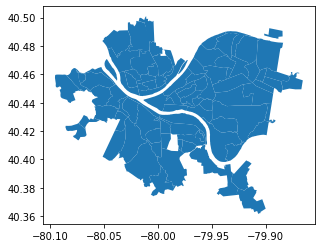

In [82]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [83]:
parks_map = neighborhoods.merge(equipment_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
parks_map[['hood','Count','geometry']].head()

,hood,Count,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,8.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


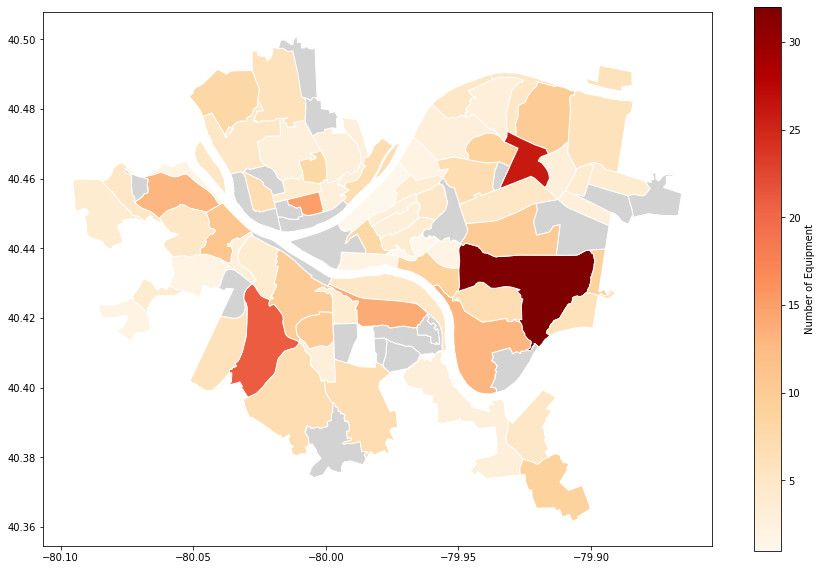

In [84]:
parks_map.plot(column='Count', 
               cmap='OrRd', 
               edgecolor='white', 
               legend=True, 
               legend_kwds={'label': "Number of Equipment"}, 
               figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"}
              )

Shows the amount of playground equipment per __neighborhood__, while marking the ones with none as __gray__.

In [85]:
sorted_parks_map = parks_map.sort_values(by='Count', ascending=False)

# Select the top 5 neighborhoods
top_5_neighborhoods = sorted_parks_map.head(5)
top_5_neighborhoods_info = top_5_neighborhoods[['neighborhood', 'Count']]
# Print or use the top 5 neighborhoods as needed
(top_5_neighborhoods_info)

,neighborhood,Count
24,Squirrel Hill South,32.0
77,East Liberty,26.0
40,Beechview,21.0
58,Allegheny Center,15.0
15,South Side Slopes,14.0


+----------------------------------------+

Picks the __top 5__ neighborhoods with the most __playground equipment__.

In [86]:
parks_map = neighborhoods.merge(equipment_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
parks_map[['hood','Count','geometry']].head()

,hood,Count,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,8.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


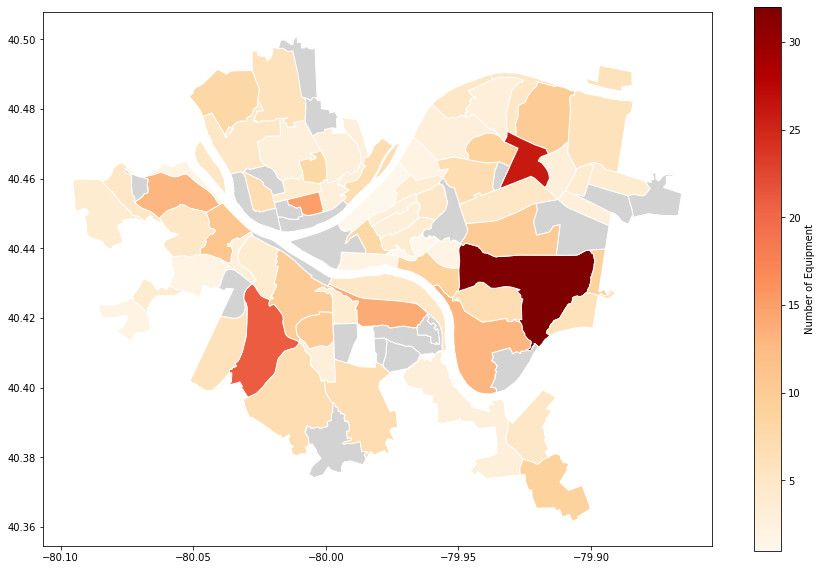

In [87]:
parks_map.plot(column='Count', 
               cmap='OrRd', 
               edgecolor='white', 
               legend=True, 
               legend_kwds={'label': "Number of Equipment"}, 
               figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"}
              )

Shows the amount of playground equipment per __neighborhood__, while marking the ones with none as __gray__.

In [88]:
sorted_parks_map = parks_map.sort_values(by='Count', ascending=False)

# Select the top 5 neighborhoods
top_5_neighborhoods = sorted_parks_map.head(5)
top_5_neighborhoods_info = top_5_neighborhoods[['neighborhood', 'Count']]
# Print or use the top 5 neighborhoods as needed
(top_5_neighborhoods_info)

,neighborhood,Count
24,Squirrel Hill South,32.0
77,East Liberty,26.0
40,Beechview,21.0
58,Allegheny Center,15.0
15,South Side Slopes,14.0


+----------------------------------------+

Picks the __top 5__ neighborhoods with the most __playground equipment__.

In [40]:
parks2 = pd.read_csv('Parks.csv')
neighborhood_counts = parks2['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.reset_index()
neighborhood_counts.columns = ['neighborhood', 'Count']
neighborhood_counts = neighborhood_counts.sort_values(by='Count', ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [41]:
parks2_map = neighborhoods.merge(neighborhood_counts, how='left', left_on='hood', right_on='neighborhood')
parks2_map = parks2_map.sort_values(by='Count', ascending=False)
parks2_map[['neighborhood','Count',]].head()

,neighborhood,Count
77,East Liberty,12.0
5,Central Business District,10.0
40,Beechview,8.0
15,South Side Slopes,7.0
33,Point Breeze,7.0


Shows the top five neighborhoods with the most parks.

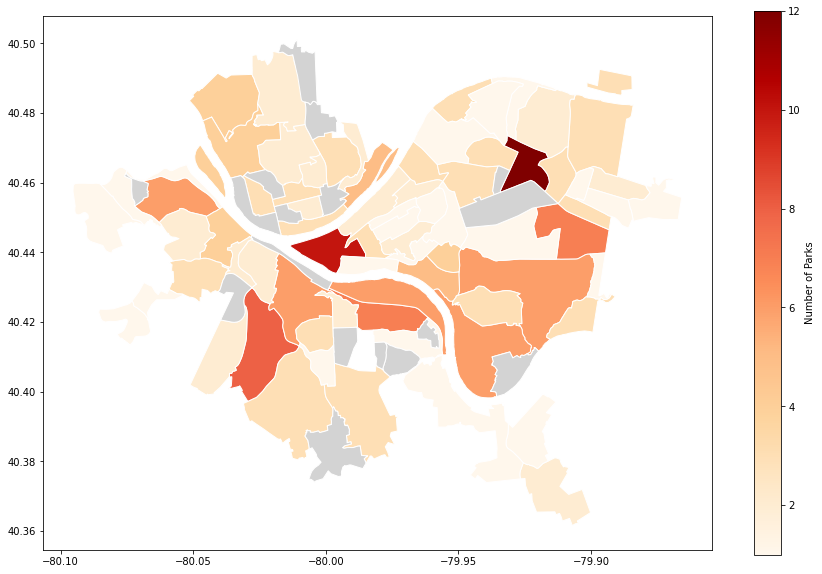

In [42]:
parks2_map.plot(column='Count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Shows the amount of parks per __neighborhood__, while marking the ones with none as __gray__.

According to this dataset, East Liberty is the most fun neighborhood with 12 parks.

The Best Neighborhood

In [116]:
parksMerge = pd.merge(parks2_map, top_5_neighborhoods_info, on='neighborhood')
parksMerge.head()
##result_df = parksMerge.groupby('neighborhood')['Count_x', 'Count_y'].sum().reset_index()
##result_df.head()
parksMerge["CountSum"] = parksMerge["Count_x"] + parksMerge["Count_y"]


In [119]:
finalMerge = pd.merge(parksMerge, fields_map, on='neighborhood')
finalMerge["FinalSum"] = finalMerge["Count"] + finalMerge["CountSum"]
finalMerge[['neighborhood','FinalSum',]].head()

,neighborhood,FinalSum
0,East Liberty,39.0
1,Beechview,32.0
2,Squirrel Hill South,45.0
3,Allegheny Center,19.0


According to our final dataset, East Liberty is the most fun neighborhood because it has the most fun things.

Conclusion